**Lesson 1 – Samples of data visualisation**

_This code shows a number of common plot types in Python. A general rule with data visualisation in python is that it is easy to create a plot, but hard to modify it to look exactly the way you want it to._

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/GitAnda/PythonCourse2020/blob/main/DataVisualisation.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# 1. General Tips: getting started

Python has a number of packages which allows the user to plot data. Matplotlib is the most thourougly tested package and it works well on all possible plotforms. Matplotlib was created in 2002 and the interface and default style of Matplotlib are old fashioned. Other packages allow the user to make more intricate plots in modern styles. These packages (such as ggplot, seaborn, holoviews, altair or pandas) build on the Matplotlib framework however, which is why we start our visualisation lesson here.

## 1.1. Import packages
Met onderstaande code kunnen de datasets ingeladen worden. Hier laden we ook het pandas package voor bewerken van datasets.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

## 1.2 Set the style
Zoals gezegd is de default style van matplotlib verouderd. Hier zetten we de style van de seaborn package vast voor alle onderstaande figuren. Wil je de style veranderen dan verwijzen we naar deze
<a href="https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html">style reference sheet</a>.


In [ ]:
plt.style.use("seaborn")

## 1.3 To `plt.show()` or not to `plt.show()`
When running matplotlib from a script you will have to call `plt.show()` to see a plot. Without `plt.show()` the code will run and finish without you seeing the results (annoying!). In a notebook (such as this) every call to a matplotlib plot will show that plot so `plt.show()` is not necessary. In a notebook, there are two ways of embedding plots:
- `%matplotlib notebook` for interactive plots
- `%matplotlib inline` for static plots

In [1]:
%matplotlib inline

## 1.4 Download data

In [2]:
import urllib

DOWNLOAD_URL = "https://github.com/GitAnda/PythonCourse2020/blob/main/datasets/83300NED_TypedDataSet_17112020_113836.csv"
urllib.request.urlretrieve(DOWNLOAD_URL)

('C:\\Users\\Anda\\AppData\\Local\\Temp\\tmp2c5x4sa6',
 <http.client.HTTPMessage at 0x1e85d446310>)

# 2. Matplotlib Plot Options

Hieronder worden verschillende soorten grafieken besproken die met matplotlib gemaakt kunnen worden:
- 1.1 Barchart
- 1.2 Piechart
- 1.3 Stackplot
- 1.4 Fill-between plot
- 1.5 Histogram
- 1.6 Scatter plot
- 1.7 Time series
- 1.8 plotting live data (nog niet af)
- 1.9 Subplots


### 1.1 Barchart

- Lezen van data pd.read_csv('test.csv')
- Bewerken van de data
- `plt.barh(labels, counts)`

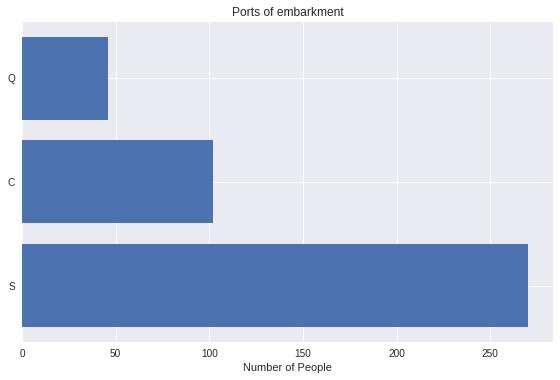

In [ ]:
data = pd.read_csv('test.csv')

data_counts = data.Embarked.value_counts()
labels = data_counts.index.tolist()
counts = data_counts.tolist()

plt.barh(labels, counts)

plt.title("Ports of embarkment")
plt.xlabel("Number of People")

plt.tight_layout()
plt.show()

### 1.2 Pie chart

- hoe plots te bewerken

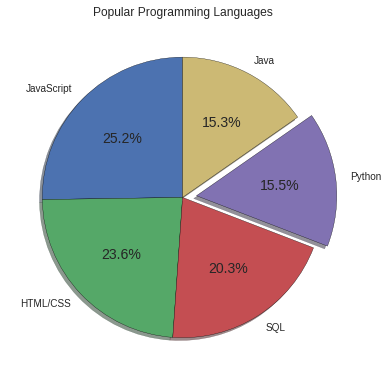

In [ ]:
slices = [59219, 55466, 47544, 36443, 35917]
labels = ['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java']
explode = [0, 0, 0, 0.1, 0]

plt.pie(slices, labels=labels, explode=explode, shadow=True, startangle=90,
        autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})

plt.title("Popular Programming Languages")
plt.tight_layout()
plt.show()

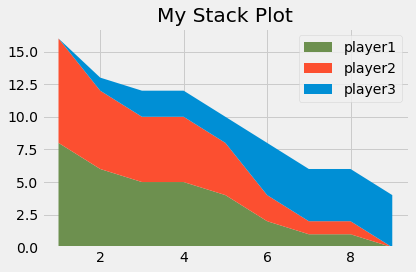

In [ ]:
minutes = [1, 2, 3, 4, 5, 6, 7, 8, 9]

player1 = [8, 6, 5, 5, 4, 2, 1, 1, 0]
player2 = [0, 1, 2, 2, 2, 4, 4, 4, 4]
player3 = [0, 1, 1, 1, 2, 2, 3, 3, 4]

labels = ['player1', 'player2', 'player3']
colors = ['#6d904f', '#fc4f30', '#008fd5']

plt.stackplot(minutes, player1, player1, player2, labels=labels, colors=colors)
plt.legend(loc='upper right')
plt.title("My Stack Plot")
plt.tight_layout()
plt.show()

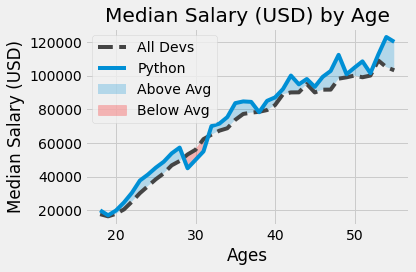

In [ ]:
data = pd.read_csv('test2.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

plt.plot(ages, dev_salaries, color='#444444', linestyle='--', label='All Devs')
plt.plot(ages, py_salaries, label='Python')

plt.fill_between(ages, py_salaries, dev_salaries,
                 where=(py_salaries > dev_salaries),
                 interpolate=True, alpha=0.25, label='Above Avg')

plt.fill_between(ages, py_salaries, dev_salaries,
                 where=(py_salaries <= dev_salaries),
                 interpolate=True, color='red', alpha=0.25, label='Below Avg')

plt.legend()

plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')

plt.tight_layout()
plt.show()

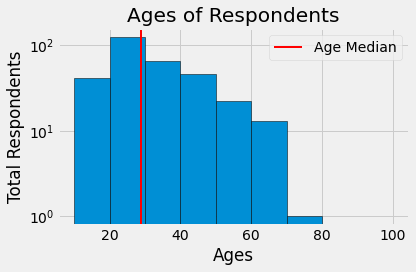

In [ ]:
data = pd.read_csv("test.csv")
ids = data['Name']
ages = data['Age']

bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.hist(ages, bins=bins, edgecolor='black', log=True, )

median_age = 29
color = 'red'

plt.axvline(median_age, color=color, label='Age Median', linewidth=2)
plt.legend()

plt.title('Ages of Respondents')
plt.xlabel('Ages')
plt.ylabel('Total Respondents')
plt.tight_layout()
plt.show()

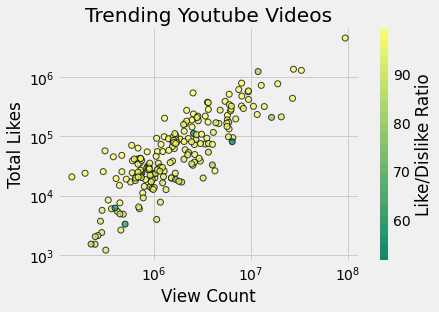

In [ ]:

from matplotlib import pyplot as plt
import pandas as pd

data = pd.read_csv('test3.csv')
view_count = data['view_count']
likes = data['likes']
ratio = data['ratio']

plt.scatter(view_count, likes, c=ratio, cmap='summer', edgecolor='black',
    linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('Like/Dislike Ratio')

plt.xscale('log')
plt.yscale('log')
plt.title("Trending Youtube Videos")
plt.xlabel('View Count')
plt.ylabel('Total Likes')

plt.show()

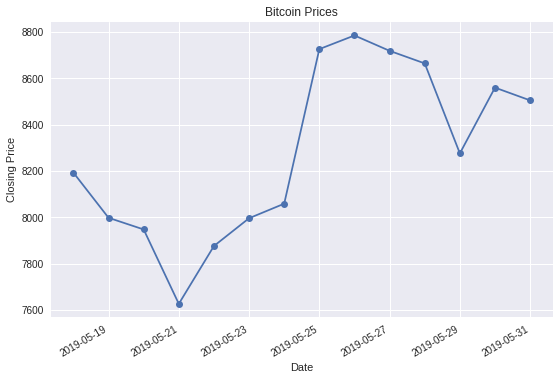

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import pandas as pd

plt.style.use('seaborn')

data = pd.read_csv('test4.csv')

data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

price_date = data['Date']
price_close = data['Close']

plt.plot_date(price_date, price_close, linestyle='solid')
plt.gcf().autofmt_xdate()

plt.title('Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.tight_layout()

plt.show()